# ***This notebook showcases Model Reproducibilty using the soltrannet model and Ersilia eos6oli model as part of the task for outreachy 2024 contribution.***

# **SECTION 1**

In [45]:
# install rdkit

!pip install rdkit

In [46]:
# installing the model

!pip install soltrannet

In [47]:
#importing necessary libraries
import soltrannet as stn
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [48]:
## Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
_ = sys.path.append("/content/drive/MyDrive/Ersilia")

In [50]:
# specifying my input folder
input_folder = "/content/drive/MyDrive/Ersilia/Model Reproducibility"

In [51]:
# specifying my output folder
output_folder = "/content/drive/MyDrive/Ersilia"

In [52]:
input_filename = "llinas2020_raw"

In [53]:
#specifying my smiles column
smiles_column = "smiles"

In [54]:
# checking the number of smiles
path = "%s/%s.csv" % (input_folder, input_filename)
smi_col = "%s" % smiles_column
df = pd.read_csv(path)
smiles = df[smi_col].tolist()


print("My dataset contains" + " " + str(len(smiles)) + " " + "SMILES")

My dataset contains 132 SMILES


In [55]:
#checking if smiles is standardised
import rdkit
from rdkit import Chem

def is_smiles(smiles):
  try:
    mol=Chem.MolFromSmiles(smiles)
    if mol is None:
      return False
    return True
  except:
    return False

In [56]:
for i in smiles:
  if is_smiles(i):
    print("Valid SMILES")
  else:
    print("Not a valid SMILES")

Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES
Valid SMILES

In [57]:
#checking the DataFrame
df.head()

,COMPOUND,SET,log S0,smiles
0,Acetazolamide,SET1,-2.38,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O
1,Acetylsalicylic Acid,SET1,-1.67,C(C)(=O)OC1=CC=CC=C1C(=O)O
2,Alclofenac,SET1,-4.40,C=CCOc1ccc(cc1Cl)CC(=O)O
3,Ambroxol,SET1,-3.87,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2
4,Aripiprazole,SET1,-6.64,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...


In [58]:
# Extracting the smiles column from the DataFrame to make predictions
my_smiles = df["smiles"].tolist()
predictions = list(stn.predict(my_smiles))
predictions

[(-1.2419066429138184, 'CC(NC1=NN=C(S1)[S](N)(=O)=O)=O', ''),
 (-1.857985258102417, 'C(C)(=O)OC1=CC=CC=C1C(=O)O', ''),
 (-3.119774103164673, 'C=CCOc1ccc(cc1Cl)CC(=O)O', ''),
 (-2.1994705200195312, 'O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2', ''),
 (-5.205143928527832,
  'O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c2)CC1',
  ''),
 (-6.521167755126953, 'O=C1c2ccccc2C(=O)C(O)=C1C1CCC(CC1)c1ccc([Cl])cc1', ''),
 (-2.817272663116455, 'CCNc1nc(nc(n1)Cl)NC(C)C', ''),
 (-1.7760666608810425, 'C1=CC(=CC=C1C(CC(O)=O)CN)Cl', ''),
 (-1.8396010398864746, 'CCC(C)C1(C(=O)NC(=O)NC1=O)CC', ''),
 (-4.210572719573975,
  'C1=C(Cl)C(=CC2=C1NC(=N[S]2(=O)=O)CSCC3=CC=CC=C3)[S](N)(=O)=O',
  ''),
 (-4.71967077255249, 'O=C1Nc2c(C(c3ncccc3)=NC1)cc(Br)cc2', ''),
 (-7.789660453796387,
  'CCOC1=NC2=CC=CC(=C2N1CC3=CC=C(C=C3)C4=CC=CC=C4C5=NNN=N5)C(=O)OC(C)OC(=O)OC6CCCCC6',
  ''),
 (-3.8526968955993652, 'C1=CC=CC3=C1N(C2=C(C=CC=C2)C=C3)C(N)=O', ''),
 (-3.251559257507324, 'C1=CC=CC2=C1[NH]C3=CC=CC=C23', ''),
 (-2.4678301

In [59]:
#specifying column names in datatframe
predictions_df = pd.DataFrame(predictions, columns=["pred", "smiles", "true_values"])
#saving predictions into a dataframe to the specified path
predictions_df.to_csv("/content/drive/MyDrive/Ersilia/Model Reproducibility/SoltranetPrediction.csv", index=False)
predictions_df

,pred,smiles,true_values
0,-1.241907,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,
1,-1.857985,C(C)(=O)OC1=CC=CC=C1C(=O)O,
2,-3.119774,C=CCOc1ccc(cc1Cl)CC(=O)O,
3,-2.199471,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,
4,-5.205144,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,
...,...,...,...
127,-3.680895,C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC,
128,-5.474015,C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)...,
129,-7.919227,CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5...,
130,-4.835241,C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)...,


# Merging the predictions I obtained from the model (as "pred" column) with the predictions obtained by the author (as "true" column) into the dataframe.

In [60]:
#matching predictions with smiles and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(predictions_df, df[['smiles', 'log S0']], how='left', left_on='smiles', right_on='smiles')

# Renaming and dropping redundant columns

merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})
merged_predictions = merged_predictions.drop(columns='true_values', axis=1)

# Displaying the result
print(merged_predictions)

         pred                                             smiles  true
0   -1.241907                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O -2.38
1   -1.857985                         C(C)(=O)OC1=CC=CC=C1C(=O)O -1.67
2   -3.119774                           C=CCOc1ccc(cc1Cl)CC(=O)O -4.40
3   -2.199471           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2 -3.87
4   -5.205144  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c... -6.64
..        ...                                                ...   ...
127 -3.680895      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC -3.74
128 -5.474015  C1=CC(=CC=C1\C(=C(C2=CC=CC=C2)\CC)C3=CC=CC=C3)... -7.52
129 -7.919227  CCCc1nc2c(cc(cc2n1Cc3ccc(cc3)c4ccccc4C(=O)O)c5... -6.73
130 -4.835241  C1=CC=CC=C1C(C3CCN(CCCC(C2=CC=C(C(C)(C)C)C=C2)... -7.74
131 -3.475417                  C3=CC1=C([NH]C(=N1)C2=CSC=N2)C=C3 -3.97

[132 rows x 3 columns]


In [61]:
# specifying path to save merged prediction
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/Model Reproducibility/merged_predictions.csv", index=False)

# Recreating the figure from the Author's publication

Generating the plots for Classification on Second Challenge to Predict Aqueous Solubility

In [62]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)

In [63]:
data={}

#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/merged_predictions.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['pred']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [64]:
np.mean(truths)

-4.321439393939395

19


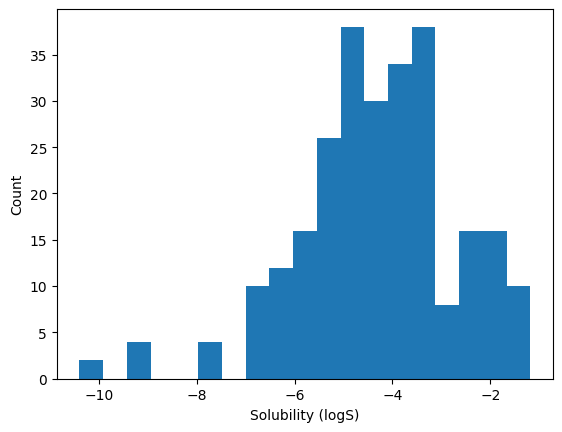

In [65]:
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Reproducibility_Histplot.png')

**Distribution of both SC2 test sets. We classified solubility as a molecule is soluble if its log S > -4**

In [66]:
import glob
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [67]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('yumpu_a', 0.7931034482758621),
   ('umut_b', 0.8793103448275862),
   ('jmsa_a', 0.9655172413793104),
   ('jcsu_a', 0.8793103448275862),
   ('jmsa_c', 0.9655172413793104),
   ('xwuc_b', 0.896551724137931),
   ('asll_a', 1.0),
   ('rfsp_a', 0.9137931034482759),
   ('hpsu_a', 0.5517241379310345),
   ('umut_a', 0.8793103448275862),
   ('ytacu', 0.7586206896551724),
   ('umut_c', 0.896551724137931),
   ('jhunc_a', 0.9482758620689655),
   ('jcsu_b', 0.9482758620689655),
   ('flwmu', 0.9482758620689655),
   ('sgurv', 0.7931034482758621),
   ('jmsa_b', 0.8793103448275862),
   ('ksmit', 0.8620689655172413),
   ('mlkc_a', 0.8620689655172413),
   ('mcsmd', 0.896551724137931),
   ('asll_b', 0.9137931034482759),
   ('xwuc_a', 0.896551724137931),
   ('pmsa_b', 0.7413793103448276),
   ('rfsp_b', 0.9482758620689655),
   ('astu', 0.7413793103448276),
   ('hpsu_b', 0.5517241379310345),
   ('mlkc_b', 0.896551724137931),
   ('yumpu_b', 0.7758620689655

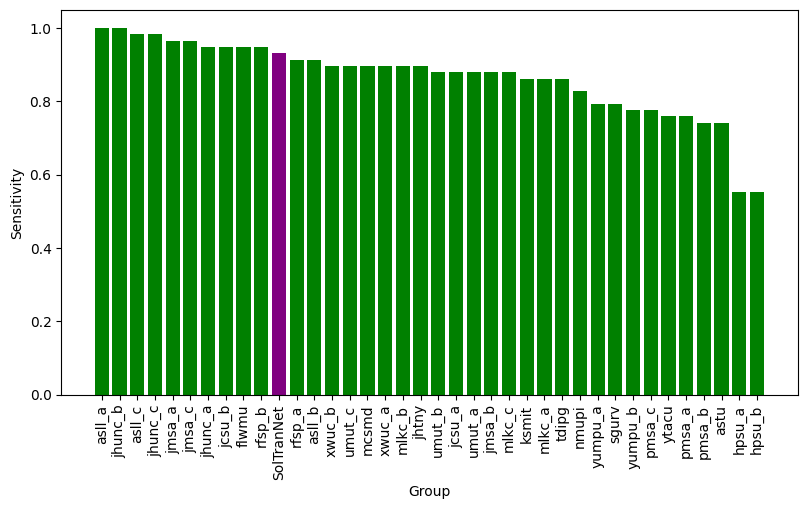

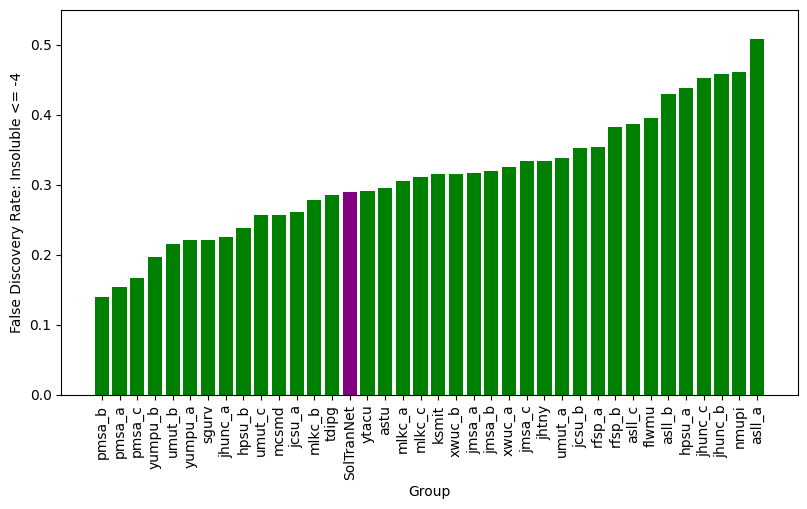

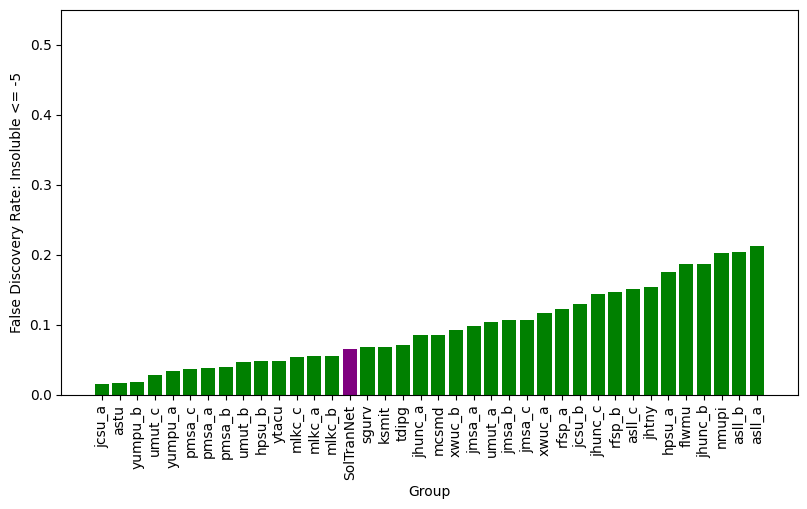

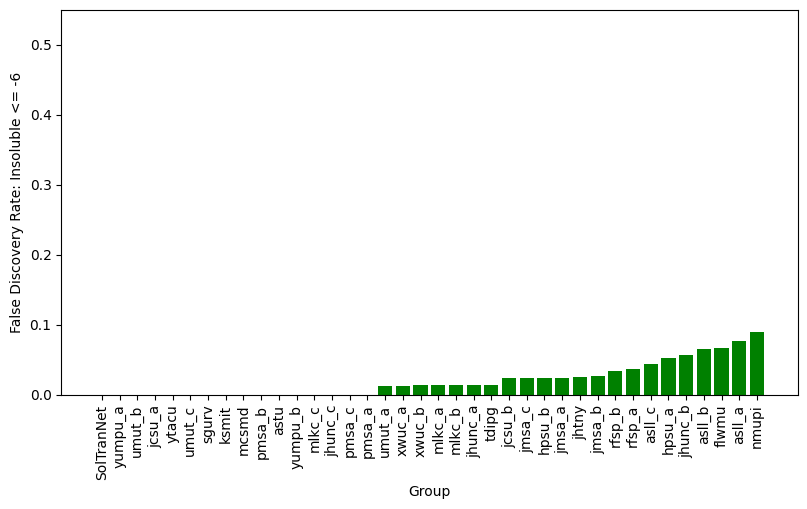

In [90]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        plt.savefig(f'/content/drive/MyDrive/Ersilia/Model Reproducibility/False_Discovery_Rates_Plots.png')
        plotted_sens=True

# **SECTION 2**

# Checking Model Reproducibility using eos6oli (Ersilia Model Hub) And The Same Dataset used by the Author

In [69]:
#creaing a miniconda environment
%%capture
%env MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.12.0-Linux-x86_64.sh
%env MINICONDA_PREFIX=/usr/local
%env PYTHONPATH= "$PYTHONPATH:/usr/local/lib/python3.7/site-packages"
%env PIP_ROOT_USER_ACTION=ignore

In [70]:
!wget https://repo.anaconda.com/miniconda/$MINICONDA_INSTALLER_SCRIPT
!chmod +x $MINICONDA_INSTALLER_SCRIPT
!./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

--2024-03-25 02:15:00--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   302MB/s    in 0.3s    

2024-03-25 02:15:00 (302 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | done

# All requested packages already installed.

installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    dire

In [71]:
!python -m pip install git+https://github.com/ersilia-os/ersilia.git
!python -m pip install requests --upgrade
!python -m pip install pandas
!rm $MINICONDA_INSTALLER_SCRIPT

  Cloning https://github.com/ersilia-os/ersilia.git to /tmp/pip-req-build-90fydx78
  Running command git clone -q https://github.com/ersilia-os/ersilia.git /tmp/pip-req-build-90fydx78
  Resolved https://github.com/ersilia-os/ersilia.git to commit 7d3908e1859eb5e518eb57109e2b66fd26b4798b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [72]:
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

# Downloading and running the selected model in Ersilia Model Hub and make sure it works     

In [73]:
model_name = "eos6oli"

# Fetching the Model

In [74]:
# Fetching the model
import time

begin = time.time()
!ersilia fetch $model_name
end = time.time()

print("Time taken:", round((end - begin), 2), "seconds")

⬇️  Fetching model eos6oli: soltrannet-aqueous-solubility
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
[]
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:44419
   PID: 19403
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
⛔ Model eos6oli closed
👍 Model eos6oli fetched successfully!
Time taken: 216.66 seconds


# Serving the Model

In [75]:
# Serving the model

# returns available APIs (calculate or predict)

!ersilia serve $model_name

sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
sudo: unknown user udockerusername
sudo: error initializing audit plugin sudoers_audit
🚀 Serving model eos6oli: soltrannet-aqueous-solubility

   URL: http://127.0.0.1:47915
   PID: 19691
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


# Running Predictions Using Soltrannet Data

In [76]:
#Running predictions
api = "calculate"

from ersilia import ErsiliaModel
import time

model = ErsiliaModel(model_name)
begin = time.time()
output = model.api(input=smiles, output="pandas")
end = time.time()

print("Successful 👍! Time taken:", round((end - begin), 2), "seconds")
model.close()

Successful 👍! Time taken: 18.16 seconds


In [77]:
# Checking the results

print(output.head())

                           key  \
0  BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1  BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2  ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3  JBDGDEWWOUBZPM-XYPYZODXSA-N   
4  CEUORZQYGODEFX-UHFFFAOYSA-N   

                                               input  solubility  
0                     CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242  
1                         C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858  
2                           C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120  
3           O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199  
4  O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205  


In [78]:
#Saving results in Google Drive

output.to_csv("/content/drive/MyDrive/Ersilia/Model Reproducibility/Ersilia_Predictions.csv", index=False)

In [79]:
Ersilia_Soltranet =pd.read_csv("/content/drive/MyDrive/Ersilia/Model Reproducibility/Ersilia_Predictions.csv")
Ersilia_Soltranet.head()

,key,input,solubility
0,BZKPWHYZMXOIDC-UHFFFAOYSA-N,CC(NC1=NN=C(S1)[S](N)(=O)=O)=O,-1.242
1,BSYNRYMUTXBXSQ-UHFFFAOYSA-N,C(C)(=O)OC1=CC=CC=C1C(=O)O,-1.858
2,ARHWPKZXBHOEEE-UHFFFAOYSA-N,C=CCOc1ccc(cc1Cl)CC(=O)O,-3.120
3,JBDGDEWWOUBZPM-XYPYZODXSA-N,O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2,-2.199
4,CEUORZQYGODEFX-UHFFFAOYSA-N,O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...,-5.205


In [80]:
#matching outputs with SMILES and returning the true solubility values
# Merging dataframes
merged_predictions = pd.merge(Ersilia_Soltranet, df[['smiles', 'log S0']], how='left', left_on='input', right_on='smiles')

# Renaming and dropping redundant columns

merged_predictions = merged_predictions.rename(columns={'log S0': 'true'})

# Displaying the result
print(merged_predictions)

                             key  \
0    BZKPWHYZMXOIDC-UHFFFAOYSA-N   
1    BSYNRYMUTXBXSQ-UHFFFAOYSA-N   
2    ARHWPKZXBHOEEE-UHFFFAOYSA-N   
3    JBDGDEWWOUBZPM-XYPYZODXSA-N   
4    CEUORZQYGODEFX-UHFFFAOYSA-N   
..                           ...   
127  ZZORFUFYDOWNEF-UHFFFAOYSA-N   
128  NKANXQFJJICGDU-QPLCGJKRSA-N   
129  RMMXLENWKUUMAY-UHFFFAOYSA-N   
130  GUGOEEXESWIERI-UHFFFAOYSA-N   
131  WJCNZQLZVWNLKY-UHFFFAOYSA-N   

                                                 input  solubility  \
0                       CC(NC1=NN=C(S1)[S](N)(=O)=O)=O      -1.242   
1                           C(C)(=O)OC1=CC=CC=C1C(=O)O      -1.858   
2                             C=CCOc1ccc(cc1Cl)CC(=O)O      -3.120   
3             O[C@@H]2CC[C@@H](NCc1cc(Br)cc(Br)c1N)CC2      -2.199   
4    O=C1Nc2c(ccc(OCCCCN3CCN(c4c(Cl)c(Cl)ccc4)CC3)c...      -5.205   
..                                                 ...         ...   
127      C1=C(N=C(N=C1N[S](C2=CC=C(N)C=C2)(=O)=O)OC)OC      -3.681   
128  C1

In [81]:
#specifying path to save merged predictions
merged_predictions.to_csv("/content/drive/MyDrive/Ersilia/Model Reproducibility/merged_Ersilia_Predictions.csv", index=False)

# Recreating figures in the publication generated with SC2 datasets using Ersilia model

In [82]:
def calc_stats(pred_array, true_array, insol_thresh=-6, sol_thresh=-4):
    '''
    This function will calculate the following on the predicted array:
        Hit% = #correct(lower_sol_thresh,upper_sol_thresh) / #(lower_sol_thresh,upper_sol_thresh)
        Fail% = #true(insol_thresh)pred(lower_sol_thresh,upper_sol_thresh) / #pred(lower_sol_thresh,upper_sol_thresh)

    Assumptions: pred_array,true_array are paired numpy arrays.
    '''

    #first we need to access the examples which have true in (lower_sol_thresh, upper_sol_thresh)
    true_mask=(true_array > sol_thresh)

    #calculating the Hit%
    num_true=len(true_array[true_mask])
    poss_hits=pred_array[true_mask]
    num_hits=np.sum((poss_hits>sol_thresh))
    hit=num_hits/float(num_true)

    #calculating the Fail%
    pred_mask=(pred_array > sol_thresh)
    insol_mask=true_array <= insol_thresh
    fail=np.sum(insol_mask & pred_mask) / float(np.sum(pred_mask))

    return hit,fail,np.sum(true_mask),np.sum(pred_mask)

In [83]:
data={}
#adding the SolTranNet data
truths=np.array([])
preds=np.array([])
for s in ['set1','set2']:
    tmp=pd.read_csv('/content/drive/MyDrive/Ersilia/Model Reproducibility/merged_Ersilia_Predictions.csv')
    t=tmp['true']
    truths=np.append(truths,t)
    p=tmp['solubility']
    preds=np.append(preds,p)

for ins in [-4,-5,-6]:
    data[ins]={'hit':[],'fail':[]}
    hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
    data[ins]['hit']=[('SolTranNet',hit)]
    data[ins]['fail']=[('SolTranNet',fail)]

In [84]:
np.mean(truths)

-4.321439393939395

19


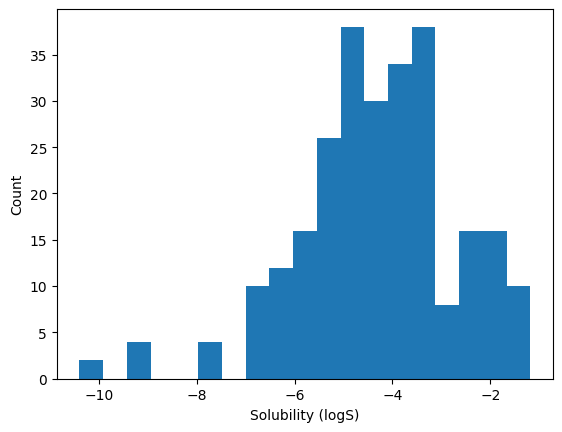

In [86]:
w=0.5
n=math.ceil((max(truths)-min(truths))/w)
print(n)
plt.hist(truths,bins=n)
plt.xlabel('Solubility (logS)')
plt.ylabel('Count')
plt.savefig('/content/drive/MyDrive/Ersilia/Model Reproducibility/Reproducibility_Histplot_Ersilia.png')

**Distribution of both SC2 test sets. We classified solubility as a molecule is soluble if its log S > -4.**


In [87]:
import glob
all_files=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/*.csv')
keys=set([x.split('/')[-1].split('_set')[0] for x in all_files])
for ins in [-4,-5,-6]:
    for k in keys:
        truths=np.array([])
        preds=np.array([])
        todo=glob.glob(f'/content/drive/MyDrive/Ersilia/submitted/{k}*.csv')
        for fname in todo:
            tmp=pd.read_csv(fname)
            t=tmp['TRUE']
            truths=np.append(truths,t)
            p=tmp['PREDICTED']
            preds=np.append(preds,p)
        hit,fail,nt,npred=calc_stats(preds,truths,ins,-4)
        if np.isnan(hit):
            print(f'{k} hit is nan')
        else:
            data[ins]['hit'].append((k,hit))

        if np.isnan(fail):
            print(f'{k} fail is nan')
        else:
            data[ins]['fail'].append((k,fail))

In [88]:
data

{-4: {'hit': [('SolTranNet', 0.9310344827586207),
   ('yumpu_a', 0.7931034482758621),
   ('umut_b', 0.8793103448275862),
   ('jmsa_a', 0.9655172413793104),
   ('jcsu_a', 0.8793103448275862),
   ('jmsa_c', 0.9655172413793104),
   ('xwuc_b', 0.896551724137931),
   ('asll_a', 1.0),
   ('rfsp_a', 0.9137931034482759),
   ('hpsu_a', 0.5517241379310345),
   ('umut_a', 0.8793103448275862),
   ('ytacu', 0.7586206896551724),
   ('umut_c', 0.896551724137931),
   ('jhunc_a', 0.9482758620689655),
   ('jcsu_b', 0.9482758620689655),
   ('flwmu', 0.9482758620689655),
   ('sgurv', 0.7931034482758621),
   ('jmsa_b', 0.8793103448275862),
   ('ksmit', 0.8620689655172413),
   ('mlkc_a', 0.8620689655172413),
   ('mcsmd', 0.896551724137931),
   ('asll_b', 0.9137931034482759),
   ('xwuc_a', 0.896551724137931),
   ('pmsa_b', 0.7413793103448276),
   ('rfsp_b', 0.9482758620689655),
   ('astu', 0.7413793103448276),
   ('hpsu_b', 0.5517241379310345),
   ('mlkc_b', 0.896551724137931),
   ('yumpu_b', 0.7758620689655

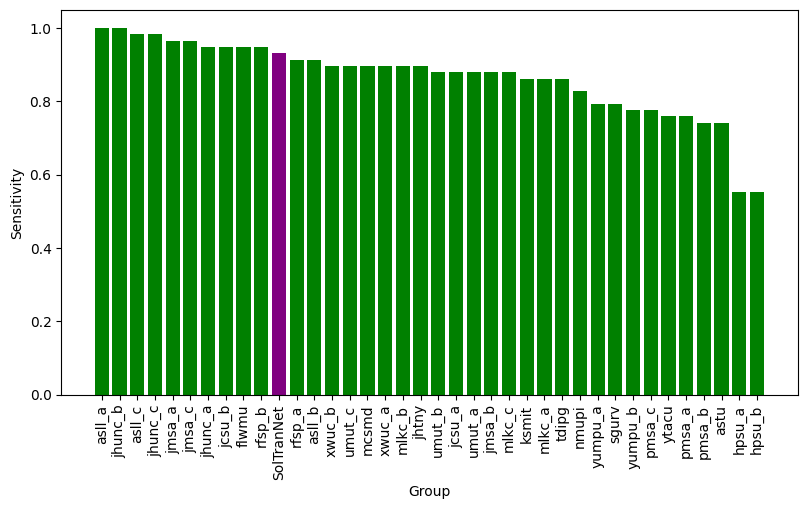

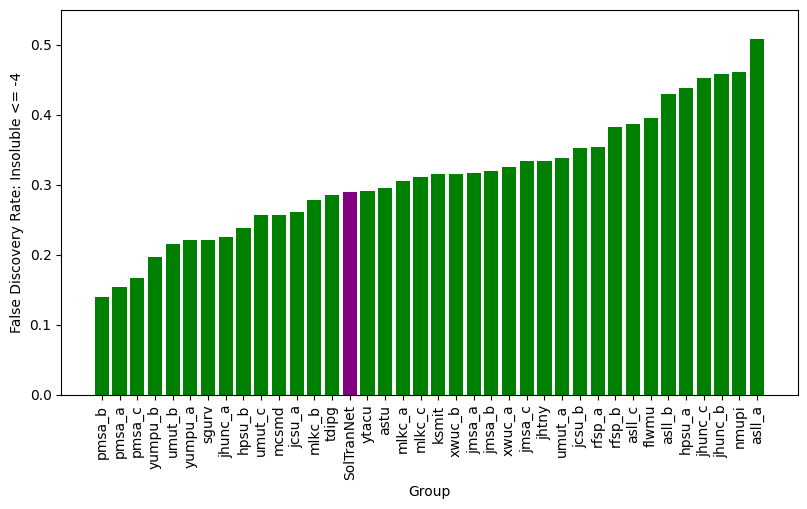

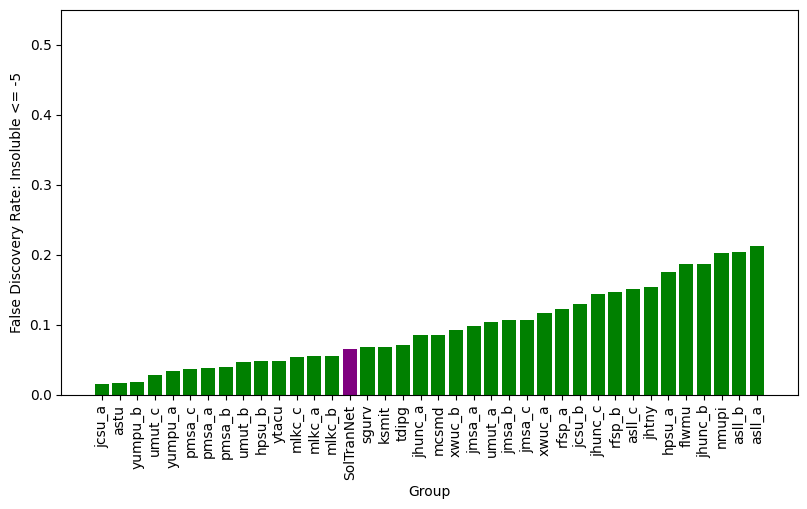

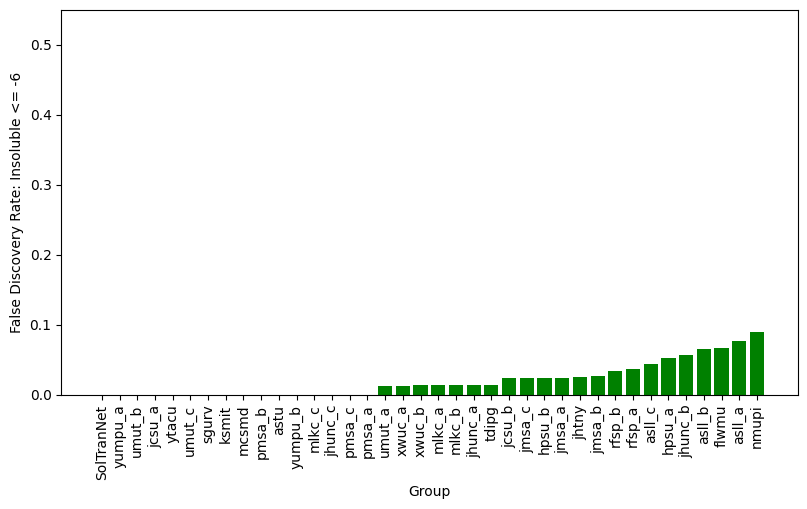

In [89]:
plotted_sens=False
for ins in data:
    for k in data[ins]:
        if k=='hit':
            if plotted_sens:
                continue
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1],reverse=True)
            plt.ylabel('Sensitivity')
        else:
            fig=plt.figure(figsize=(9.5,5))
            all_data=sorted(data[ins][k],key=lambda x:x[1])
            plt.ylabel(f'False Discovery Rate: Insoluble <= {ins}')
            plt.ylim((0,0.55))

        labels=[x[0] for x in all_data]
        ys=[x[1] for x in all_data]
        x_pos=[i for i,_ in enumerate(all_data)]
        colors=['purple' if x[0]=='SolTranNet' else 'green' for x in all_data]
        plt.bar(x_pos,ys,color=colors)
        plt.xlabel('Group')
        plt.xticks(x_pos,labels,rotation='vertical')
        filename = f'/content/drive/MyDrive/Ersilia/Model Reproducibility/False_Discovery_Rates_ErsiliaPlot_{ins}Ersilia.png'
        plt.savefig(filename)
        plotted_sens=True

**We can observe from above that the Ersilia Model produce the exact same chart from values to count as the SolTrannet Model using the same dataset from the Publications.**

**This indicates the reproducibility of the eos6oli model.**